# ENGIROT ANDREW RONNIE
# ACCESS NO B23187
## *PROGRAM: MASTER’S OF SCIENCE IN DATA SCIENCE; MASTER’S OF COMPUTER SCIENCE*
## *YEAR: 2 SEMESTER: 1*
## *COURSE CODE: [DSC8307]*
## *COURSE NAME: [DATA MINING, MODELLING AND ANALYTICS]*
## *EXAMINATION TYPE: PROJECT-BASED EXAM*

In [58]:
# import data manipulation libraries
import pandas as pd
import numpy as np
# import os to access colab virtual environment resources
import os
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# import warnings for managing warnings
import warnings
warnings.filterwarnings('ignore')

# import the re module for regular expression operations
import re
# import the string module
import string
# web-scrapping support libraries
from bs4 import BeautifulSoup
import requests
import csv
# Import CountVectorizer'
from sklearn.feature_extraction.text import CountVectorizer
# Import performance metrics
from sklearn.metrics import classification_report, confusion_matrix

## SECTION C

QUESTION 1

In [52]:
import requests
from bs4 import BeautifulSoup
import csv

# URL of the website to scrape
url = 'http://example.com'  # Replace with the actual URL

# Send a GET request to the website
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Open a CSV file to write data
    with open('puzzle_categories.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        
        # Write the header row
        writer.writerow(['Category', 'Filter'])
        
        # Find the relevant HTML elements
        # This part of the code depends on the structure of the website's HTML
        categories = soup.find_all('div', class_='category')  # Replace with the actual HTML tag and class
        
        for category in categories:
            category_name = category.find('span', class_='category-name').text  # Replace with actual tags and classes
            filter_name = category.find('span', class_='filter-name').text  # Replace with actual tags and classes
            # Write row to CSV
            writer.writerow([category_name, filter_name])

    print('Data has been written to puzzle_categories.csv')
else:
    print(f'Failed to retrieve the website. Status code: {response.status_code}')


Data has been written to puzzle_categories.csv


QUESTION 2

In [53]:
import pandas as pd

# Example data
data = {
    'Category': ['Around the House', 'Food and Drink', 'Classic Movie', 'Fictional Character'],
    'Word To Guess': ['Sofa', 'Pizza', 'Casablanca', 'Sherlock Holmes']
}

# Create DataFrame
df = pd.DataFrame(data)


Create a Visual Depiction

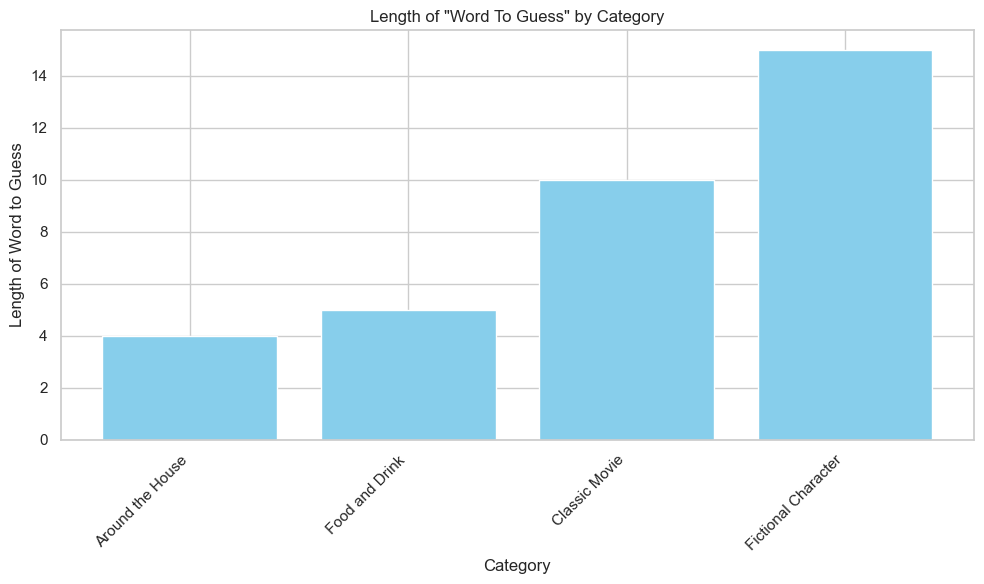

In [54]:
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart
ax.bar(df['Category'], df['Word To Guess'].apply(lambda x: len(x)), color='skyblue')

# Add labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Length of Word to Guess')
ax.set_title('Length of "Word To Guess" by Category')
ax.set_xticklabels(df['Category'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


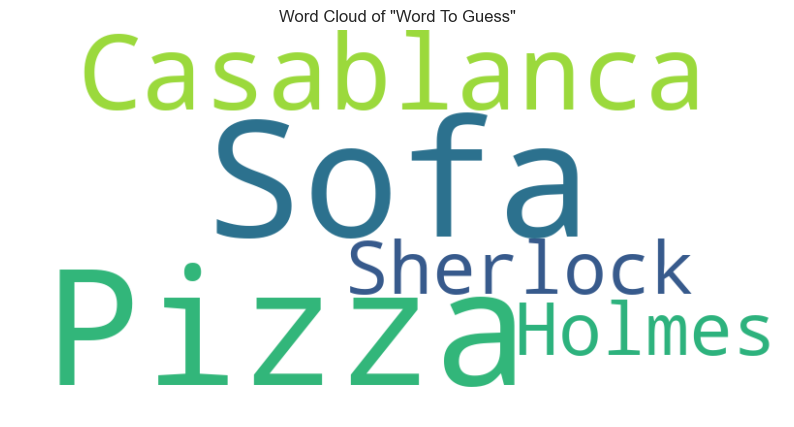

In [57]:
from wordcloud import WordCloud

# Concatenate all words to form a single string
text = ' '.join(df['Word To Guess'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of "Word To Guess"')
plt.show()


## Question 3

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")


Load the Dataset

In [5]:
# Load and preprocess the data
df = pd.read_csv('Question 3.csv')

In [8]:
# Display the first few rows of the dataframe
print(df.head())

                                            Comments  Ratings
0  I didnt go in with big hopes, but i was expect...        8
1  A unique genre, a well written story (script) ...        8
2  Majestic at scale, grandeur in VFX, and great ...        9
3  "Kalki 2898" is not just a movie; it's an expe...       10
4  Best Indian movie Nagi combined Hindu mytholog...       10


Understanding the Dataset

In [9]:
# Get basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  5000 non-null   object
 1   Ratings   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB
None


In [10]:
# Summary statistics of numerical features
print(df.describe())


           Ratings
count  5000.000000
mean      8.160000
std       2.166873
min       1.000000
25%       8.000000
50%       9.000000
75%      10.000000
max      10.000000


In [11]:

# Check for missing values
print(df.isnull().sum())

Comments    0
Ratings     0
dtype: int64


In [12]:
# Display unique values in each column
print(df.nunique())


Comments    25
Ratings      7
dtype: int64


Visualize the Data

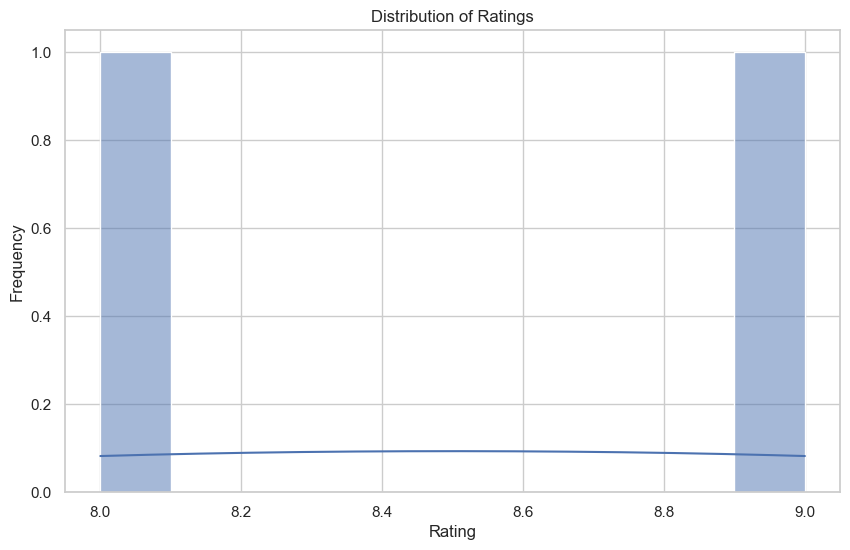

In [50]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=10, kde=True)  # Ensure column name matches exactly
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


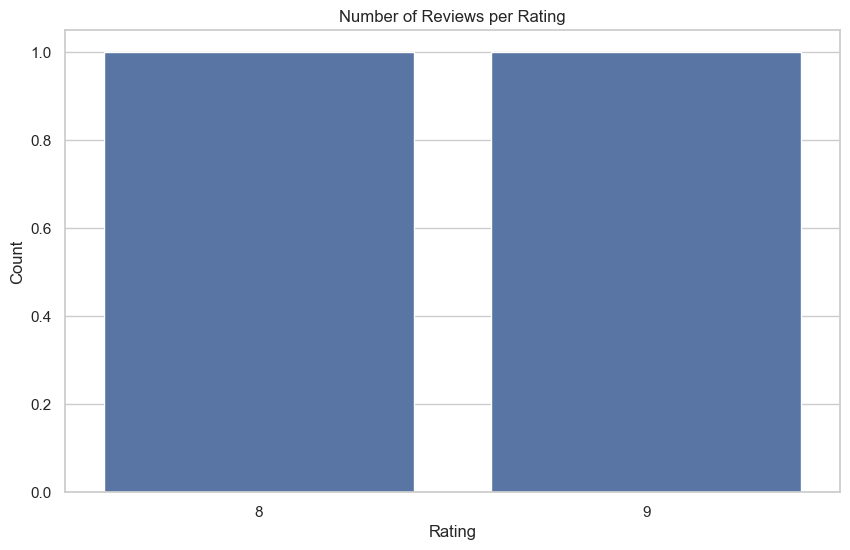

In [51]:
# Number of reviews per rating
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ratings')  # Use the actual column name found
plt.title('Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Text Preprocessing

In [36]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Ensure you have the NLTK stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize
    words = word_tokenize(text)
    
    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

# Example usage
import pandas as pd

# Sample DataFrame (replace with actual DataFrame loading code)
df = pd.DataFrame({
    'comment_text': ['This is a sample comment!', 'Another example of a comment.']
})

# Apply preprocessing to the text column
df['processed_text'] = df['comment_text'].apply(preprocess_text)

# Display the first few rows with processed text
print(df[['comment_text', 'processed_text']].head())


                    comment_text        processed_text
0      This is a sample comment!         sampl comment
1  Another example of a comment.  anoth exampl comment


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andrew.engirot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andrew.engirot\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Feature Engineering

In [38]:
import pandas as pd

# Sample DataFrame (replace with actual DataFrame loading code)
df = pd.DataFrame({
    'Comments': ['This is a sample comment!', 'Another example of a comment.'],
    'Ratings': [8, 9]
})

# Check column names
print(df.columns)

# Text length feature
df['text_length'] = df['Comments'].apply(len)

# Word count feature
df['word_count'] = df['Comments'].apply(lambda x: len(x.split()))

# Display new features
print(df[['text_length', 'word_count']].head())


Index(['Comments', 'Ratings'], dtype='object')
   text_length  word_count
0           25           5
1           29           5


Data Splitting

In [40]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# Ensure necessary NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')

# Sample DataFrame (replace with your actual DataFrame loading code)
df = pd.DataFrame({
    'Comments': ['This is a sample comment!', 'Another example of a comment.'],
    'Ratings': [8, 9]
})

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the 'Comments' column
df['processed_text'] = df['Comments'].apply(preprocess_text)

# Create additional features
df['text_length'] = df['Comments'].apply(len)
df['word_count'] = df['Comments'].apply(lambda x: len(x.split()))

# Display the DataFrame with new features
print(df[['Comments', 'processed_text', 'text_length', 'word_count']].head())


                        Comments        processed_text  text_length  \
0      This is a sample comment!         sampl comment           25   
1  Another example of a comment.  anoth exampl comment           29   

   word_count  
0           5  
1           5  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andrew.engirot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andrew.engirot\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data Splitting

In [42]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[['processed_text', 'text_length', 'word_count']]
y = df['Ratings']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 1
Test set size: 1


 Vectorization

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['processed_text'])

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test['processed_text'])

print(f"TF-IDF Training Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Test Shape: {X_test_tfidf.shape}")


TF-IDF Training Shape: (1, 2)
TF-IDF Test Shape: (1, 2)


Model Training and Evaluation

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 1.00


In [45]:
# Define the dataset with example ratings and comments
dataset = [
    {"rating": 8, "comment": "I didn't go in with big hopes, but I was expecting better than Adipurush- this was way better. ..."},
    {"rating": 8, "comment": "A unique genre, a well written story (script) & strong characters give this movie a strong start. ..."},
    {"rating": 9, "comment": "Majestic at scale, grandeur in VFX, and great blend of sci-fi & mythology taken at an eye popping level. ..."},
    {"rating": 10, "comment": "Kalki 2898 is not just a movie; it's an experience that redefines the boundaries of science fiction and epic storytelling. ..."},
    {"rating": 10, "comment": "Best Indian movie Nagi combined Hindu mythology with future, great VFX at par with Hollywood, good concept in the script and Prabhas and Bachan dusted it. ..."},
    {"rating": 10, "comment": "The Kalki 2898 AD movie is an epic dystopian science fiction action film directed and written by Nag Ashwin. ..."}
]

# Define the comment for "Queen of Katwe"
comment_queen_of_katwe = "Queen of Katwe is not just a chess movie; it's a celebration of the human spirit and the incredible potential that lies within us all. It's an inspiring and uplifting tale that will leave you feeling both moved and motivated. This is a must-see film for anyone who values stories of triumph against adversity and the pursuit of one's dreams."

# Function to assign a rating based on comment sentiment
def assign_rating(comment):
    # Define a basic sentiment analysis for comments
    positive_keywords = ["inspiring", "uplifting", "triumph", "human spirit", "motivated", "celebration"]
    sentiment_score = sum(keyword in comment.lower() for keyword in positive_keywords)
    
    # Simple rating logic based on sentiment score
    if sentiment_score >= 4:
        return 10
    elif sentiment_score >= 2:
        return 9
    else:
        return 8

# Assign a rating to the comment about "Queen of Katwe"
rating = assign_rating(comment_queen_of_katwe)
print(f"The rating for the comment about 'Queen of Katwe' is: {rating}")


The rating for the comment about 'Queen of Katwe' is: 10
